In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import torchvision
import matplotlib.pyplot as plt
import numpy as np

from torch.autograd import Variable

### Creating config object (argparse workaround)

In [2]:
class Config:
    pass

config = Config()
config.mnist_path = None
config.batch_size = 16
config.num_workers = 3
config.num_epochs = 10
config.noise_size = 50
config.print_freq = 100


### Create dataloder

In [3]:
train = torchvision.datasets.FashionMNIST("fashion_mnist", train=True, transform=torchvision.transforms.ToTensor(), download=True)

In [4]:
dataloader = DataLoader(train, batch_size=config.batch_size, shuffle=True)

In [5]:
len(dataloader)

3750

In [6]:
for image, cat in dataloader:
    break

In [7]:
image.size()

torch.Size([16, 1, 28, 28])

In [8]:
cat

tensor([4, 2, 5, 1, 2, 2, 3, 8, 8, 9, 5, 6, 5, 0, 5, 7])

In [9]:
28*28

784

### Create generator and discriminator

In [10]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential( 
            nn.Linear(config.noise_size, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 28*28),
            nn.Sigmoid())
        
    def forward(self, x):
        return self.model(x)
    
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 50),
            nn.ReLU(inplace=True),
            nn.Linear(50, 1), 
            nn.Sigmoid())
    def forward(self, x):
        return self.model(x)

In [11]:
generator = Generator()
discriminator = Discriminator()

### Create optimizers and loss

In [12]:
optim_G = optim.Adam(params=generator.parameters(), lr=0.0001)
optim_D = optim.Adam(params=discriminator.parameters(), lr=0.0001)

criterion = nn.BCELoss()

### Create necessary variables

In [13]:
#input = Variable(torch.FloatTensor(config.batch_size, 28*28))
noise = Variable(torch.FloatTensor(config.batch_size, config.noise_size))
#fixed_noise = Variable(torch.FloatTensor(config.batch_size, config.noise_size).normal_(0, 1))
label = Variable(torch.FloatTensor(config.batch_size))
real_label = 1
fake_label = 0

### Задание

1) Посмотрите на реализацию GAN. Постройте интерполяцию между какими-нибудь двумя сгенерированными картинками. (Опционально)Добавьте свертки в генератор и дискриминатор, как в статье про DCGAN.

2) Поменяйте ее, чтобы получился LSGAN https://arxiv.org/pdf/1611.04076v2.pdf

3) Добавьте к обучению GAN условие на метку, продемонстрируйте условную генерацию. https://arxiv.org/pdf/1411.1784.pdf

4) Напишите отчет что попробовали, какие результаты получили, как вам кажется надо обучать GAN, чтобы добиться сходимости?

В каждом пункте постройте графики функций потерь.

### GAN

# 1) Посмотрите на реализацию GAN. Постройте интерполяцию между какими-нибудь двумя сгенерированными картинками.

Epoch:1 Iter: 100 errD_x: 0.60 errD_z: 0.18 errG: 2.22
Epoch:1 Iter: 200 errD_x: 0.30 errD_z: 0.17 errG: 2.19
Epoch:1 Iter: 300 errD_x: 0.33 errD_z: 0.14 errG: 2.69
Epoch:1 Iter: 400 errD_x: 0.40 errD_z: 0.08 errG: 2.56
Epoch:1 Iter: 500 errD_x: 0.53 errD_z: 0.07 errG: 2.97
Epoch:1 Iter: 600 errD_x: 0.15 errD_z: 0.06 errG: 3.84
Epoch:1 Iter: 700 errD_x: 0.97 errD_z: 0.14 errG: 2.41
Epoch:1 Iter: 800 errD_x: 0.40 errD_z: 0.27 errG: 1.99
Epoch:1 Iter: 900 errD_x: 0.12 errD_z: 0.25 errG: 2.27
Epoch:1 Iter: 1000 errD_x: 0.35 errD_z: 0.11 errG: 2.66
Epoch:1 Iter: 1100 errD_x: 0.94 errD_z: 0.26 errG: 2.42
Epoch:1 Iter: 1200 errD_x: 0.26 errD_z: 0.21 errG: 2.67
Epoch:1 Iter: 1300 errD_x: 0.12 errD_z: 0.36 errG: 1.61
Epoch:1 Iter: 1400 errD_x: 0.35 errD_z: 0.32 errG: 1.65
Epoch:1 Iter: 1500 errD_x: 0.07 errD_z: 0.14 errG: 2.72
Epoch:1 Iter: 1600 errD_x: 0.42 errD_z: 0.10 errG: 2.89
Epoch:1 Iter: 1700 errD_x: 0.27 errD_z: 0.36 errG: 1.63
Epoch:1 Iter: 1800 errD_x: 0.69 errD_z: 0.34 errG: 1.38
E

Epoch:4 Iter: 3700 errD_x: 0.42 errD_z: 0.32 errG: 1.44
Epoch:5 Iter: 100 errD_x: 0.47 errD_z: 0.30 errG: 1.61
Epoch:5 Iter: 200 errD_x: 0.57 errD_z: 0.41 errG: 1.24
Epoch:5 Iter: 300 errD_x: 0.31 errD_z: 0.50 errG: 1.29
Epoch:5 Iter: 400 errD_x: 0.23 errD_z: 0.32 errG: 1.39
Epoch:5 Iter: 500 errD_x: 0.46 errD_z: 0.29 errG: 1.52
Epoch:5 Iter: 600 errD_x: 0.37 errD_z: 0.34 errG: 1.41
Epoch:5 Iter: 700 errD_x: 0.42 errD_z: 0.35 errG: 1.60
Epoch:5 Iter: 800 errD_x: 0.26 errD_z: 0.36 errG: 1.49
Epoch:5 Iter: 900 errD_x: 0.50 errD_z: 0.49 errG: 1.26
Epoch:5 Iter: 1000 errD_x: 0.44 errD_z: 0.24 errG: 1.62
Epoch:5 Iter: 1100 errD_x: 0.27 errD_z: 0.51 errG: 1.05
Epoch:5 Iter: 1200 errD_x: 0.19 errD_z: 0.44 errG: 1.13
Epoch:5 Iter: 1300 errD_x: 0.59 errD_z: 0.51 errG: 1.11
Epoch:5 Iter: 1400 errD_x: 0.54 errD_z: 0.15 errG: 2.20
Epoch:5 Iter: 1500 errD_x: 0.86 errD_z: 0.37 errG: 1.39
Epoch:5 Iter: 1600 errD_x: 0.47 errD_z: 0.28 errG: 1.57
Epoch:5 Iter: 1700 errD_x: 0.67 errD_z: 0.21 errG: 1.63
E

Epoch:8 Iter: 3600 errD_x: 0.43 errD_z: 0.17 errG: 1.86
Epoch:8 Iter: 3700 errD_x: 0.46 errD_z: 0.15 errG: 2.44
Epoch:9 Iter: 100 errD_x: 0.59 errD_z: 0.29 errG: 1.74
Epoch:9 Iter: 200 errD_x: 0.28 errD_z: 0.43 errG: 1.44
Epoch:9 Iter: 300 errD_x: 0.49 errD_z: 0.35 errG: 1.74
Epoch:9 Iter: 400 errD_x: 0.47 errD_z: 0.32 errG: 1.83
Epoch:9 Iter: 500 errD_x: 0.72 errD_z: 0.20 errG: 2.04
Epoch:9 Iter: 600 errD_x: 0.43 errD_z: 0.22 errG: 1.81
Epoch:9 Iter: 700 errD_x: 0.47 errD_z: 0.69 errG: 1.36
Epoch:9 Iter: 800 errD_x: 0.39 errD_z: 0.28 errG: 1.53
Epoch:9 Iter: 900 errD_x: 0.60 errD_z: 0.31 errG: 1.61
Epoch:9 Iter: 1000 errD_x: 0.63 errD_z: 0.27 errG: 1.51
Epoch:9 Iter: 1100 errD_x: 0.28 errD_z: 0.36 errG: 1.53
Epoch:9 Iter: 1200 errD_x: 0.62 errD_z: 0.42 errG: 1.33
Epoch:9 Iter: 1300 errD_x: 0.49 errD_z: 0.38 errG: 1.47
Epoch:9 Iter: 1400 errD_x: 0.56 errD_z: 0.32 errG: 1.53
Epoch:9 Iter: 1500 errD_x: 0.28 errD_z: 0.24 errG: 2.14
Epoch:9 Iter: 1600 errD_x: 0.91 errD_z: 0.35 errG: 1.57
E

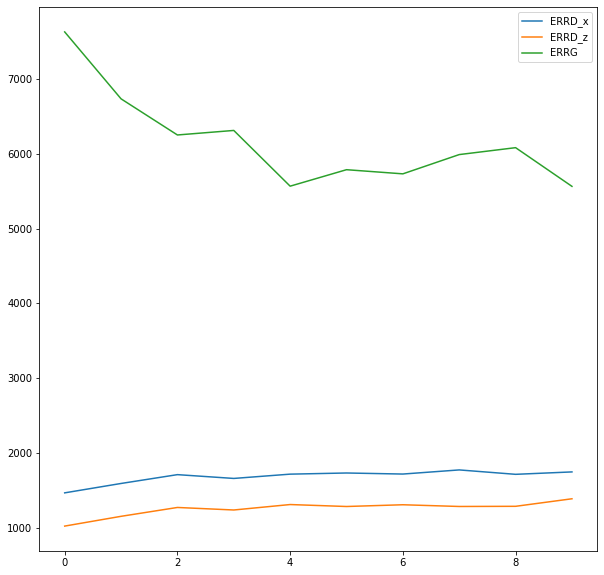

In [17]:
ERRD_x = np.zeros(config.num_epochs)
ERRD_z = np.zeros(config.num_epochs)
ERRG = np.zeros(config.num_epochs)
#z is noise
#x is pictures
N = len(dataloader)

for epoch in range(config.num_epochs):
    for iteration, (images, cat) in enumerate(dataloader):
        ####### 
        # Generator is fixed
        # Discriminator stage: maximize log(D(x)) + log(1 - D(G(z))) 
        #######
        discriminator.zero_grad()
        
        # real
        label.data.fill_(real_label)
        input_data = images.view(images.shape[0], -1)
        output = discriminator(input_data)
        errD_x = criterion(output, label.unsqueeze(-1))
        ERRD_x[epoch] += errD_x.item()
        errD_x.backward()
        
        # fake 
        noise.data.normal_(0, 1)
        fake = generator(noise)
        label.data.fill_(fake_label)
        output = discriminator(fake.detach())
        errD_z = criterion(output, label.unsqueeze(-1))
        ERRD_z[epoch] += errD_z.item()
        errD_z.backward()
        
        optim_D.step()
        
        ####### 
        # Discriminator is fixed
        # Generator stage: maximize log(D(G(z)) ekv minimize (1-log(D(G(z)))
        #######
        generator.zero_grad()
        label.data.fill_(real_label) #to have only 1st elem in cross-entropy
        output = discriminator(fake) #to have only 2nd elem in gan-formula
        errG = criterion(output, label.unsqueeze(-1))
        ERRG[epoch] += errG.item()
        errG.backward()
        
        optim_G.step()
        
        if (iteration+1) % config.print_freq == 0:
            print('Epoch:{} Iter: {} errD_x: {:.2f} errD_z: {:.2f} errG: {:.2f}'.format(epoch+1,
                                                                                            iteration+1, 
                                                                                            errD_x.item(),
                                                                                            errD_z.item(), 
                                                                                            errG.item()))
            
            
plt.figure(figsize=(10,10))
plt.plot(ERRD_x,label='ERRD_x')
plt.plot(ERRD_z,label='ERRD_z')
plt.plot(ERRG,label='ERRG')
plt.legend()
plt.show()

### Сгенерируем картинки этим генератором

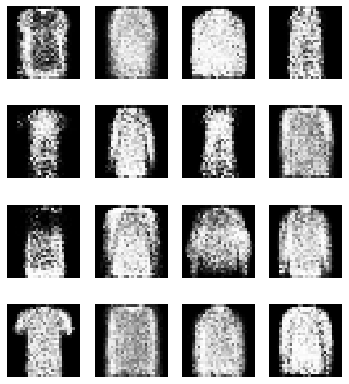

In [18]:
noise.data.normal_(0, 1)
fake = generator(noise)

plt.figure(figsize=(6, 7))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(fake[i].detach().numpy().reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.axis('off')

### Постройте интерполяцию между какими-нибудь двумя сгенерированными картинками.

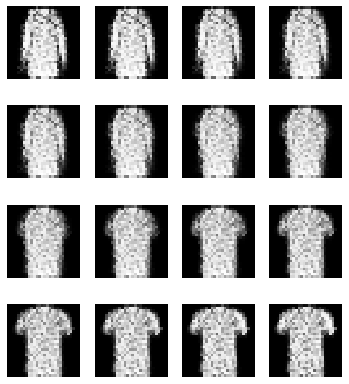

In [19]:
noise1=noise[5]
noise2=noise[12]
mas_of_linspaces=[]
for d in range(config.noise_size):
    mas_of_linspaces.append(np.linspace(noise1[d],noise2[d],16))
mas_of_linspaces=torch.Tensor(np.array(mas_of_linspaces).T)
fake = generator(mas_of_linspaces)

plt.figure(figsize=(6, 7))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(fake[i].detach().numpy().reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.axis('off')

# 2) Поменяйте ее, чтобы получился LSGAN https://arxiv.org/pdf/1611.04076v2.pdf

Epoch:1 Iter: 100 errD_x: 0.04 errD_z: 0.03 errG: 0.70
Epoch:1 Iter: 200 errD_x: 0.07 errD_z: 0.05 errG: 0.65
Epoch:1 Iter: 300 errD_x: 0.04 errD_z: 0.01 errG: 0.81
Epoch:1 Iter: 400 errD_x: 0.05 errD_z: 0.01 errG: 0.79
Epoch:1 Iter: 500 errD_x: 0.06 errD_z: 0.01 errG: 0.83
Epoch:1 Iter: 600 errD_x: 0.06 errD_z: 0.02 errG: 0.78
Epoch:1 Iter: 700 errD_x: 0.07 errD_z: 0.01 errG: 0.87
Epoch:1 Iter: 800 errD_x: 0.00 errD_z: 0.02 errG: 0.82
Epoch:1 Iter: 900 errD_x: 0.00 errD_z: 0.01 errG: 0.86
Epoch:1 Iter: 1000 errD_x: 0.01 errD_z: 0.01 errG: 0.89
Epoch:1 Iter: 1100 errD_x: 0.04 errD_z: 0.01 errG: 0.87
Epoch:1 Iter: 1200 errD_x: 0.14 errD_z: 0.02 errG: 0.78
Epoch:1 Iter: 1300 errD_x: 0.06 errD_z: 0.02 errG: 0.80
Epoch:1 Iter: 1400 errD_x: 0.06 errD_z: 0.05 errG: 0.73
Epoch:1 Iter: 1500 errD_x: 0.13 errD_z: 0.05 errG: 0.69
Epoch:1 Iter: 1600 errD_x: 0.01 errD_z: 0.07 errG: 0.68
Epoch:1 Iter: 1700 errD_x: 0.03 errD_z: 0.07 errG: 0.70
Epoch:1 Iter: 1800 errD_x: 0.02 errD_z: 0.04 errG: 0.76
E

Epoch:4 Iter: 3700 errD_x: 0.11 errD_z: 0.07 errG: 0.82
Epoch:5 Iter: 100 errD_x: 0.17 errD_z: 0.02 errG: 0.93
Epoch:5 Iter: 200 errD_x: 0.15 errD_z: 0.01 errG: 0.90
Epoch:5 Iter: 300 errD_x: 0.03 errD_z: 0.02 errG: 0.83
Epoch:5 Iter: 400 errD_x: 0.06 errD_z: 0.00 errG: 0.94
Epoch:5 Iter: 500 errD_x: 0.16 errD_z: 0.03 errG: 0.77
Epoch:5 Iter: 600 errD_x: 0.07 errD_z: 0.05 errG: 0.84
Epoch:5 Iter: 700 errD_x: 0.07 errD_z: 0.07 errG: 0.76
Epoch:5 Iter: 800 errD_x: 0.08 errD_z: 0.18 errG: 0.61
Epoch:5 Iter: 900 errD_x: 0.04 errD_z: 0.17 errG: 0.65
Epoch:5 Iter: 1000 errD_x: 0.16 errD_z: 0.01 errG: 0.90
Epoch:5 Iter: 1100 errD_x: 0.26 errD_z: 0.03 errG: 0.72
Epoch:5 Iter: 1200 errD_x: 0.10 errD_z: 0.10 errG: 0.59
Epoch:5 Iter: 1300 errD_x: 0.10 errD_z: 0.05 errG: 0.69
Epoch:5 Iter: 1400 errD_x: 0.18 errD_z: 0.10 errG: 0.60
Epoch:5 Iter: 1500 errD_x: 0.16 errD_z: 0.05 errG: 0.74
Epoch:5 Iter: 1600 errD_x: 0.05 errD_z: 0.03 errG: 0.79
Epoch:5 Iter: 1700 errD_x: 0.13 errD_z: 0.02 errG: 0.89
E

Epoch:8 Iter: 3600 errD_x: 0.23 errD_z: 0.06 errG: 0.77
Epoch:8 Iter: 3700 errD_x: 0.10 errD_z: 0.05 errG: 0.76
Epoch:9 Iter: 100 errD_x: 0.12 errD_z: 0.11 errG: 0.66
Epoch:9 Iter: 200 errD_x: 0.15 errD_z: 0.06 errG: 0.58
Epoch:9 Iter: 300 errD_x: 0.23 errD_z: 0.02 errG: 0.75
Epoch:9 Iter: 400 errD_x: 0.23 errD_z: 0.12 errG: 0.64
Epoch:9 Iter: 500 errD_x: 0.19 errD_z: 0.11 errG: 0.57
Epoch:9 Iter: 600 errD_x: 0.10 errD_z: 0.05 errG: 0.81
Epoch:9 Iter: 700 errD_x: 0.13 errD_z: 0.04 errG: 0.81
Epoch:9 Iter: 800 errD_x: 0.07 errD_z: 0.04 errG: 0.77
Epoch:9 Iter: 900 errD_x: 0.13 errD_z: 0.06 errG: 0.67
Epoch:9 Iter: 1000 errD_x: 0.06 errD_z: 0.05 errG: 0.69
Epoch:9 Iter: 1100 errD_x: 0.11 errD_z: 0.11 errG: 0.62
Epoch:9 Iter: 1200 errD_x: 0.10 errD_z: 0.14 errG: 0.54
Epoch:9 Iter: 1300 errD_x: 0.18 errD_z: 0.03 errG: 0.81
Epoch:9 Iter: 1400 errD_x: 0.10 errD_z: 0.05 errG: 0.77
Epoch:9 Iter: 1500 errD_x: 0.20 errD_z: 0.04 errG: 0.86
Epoch:9 Iter: 1600 errD_x: 0.17 errD_z: 0.07 errG: 0.77
E

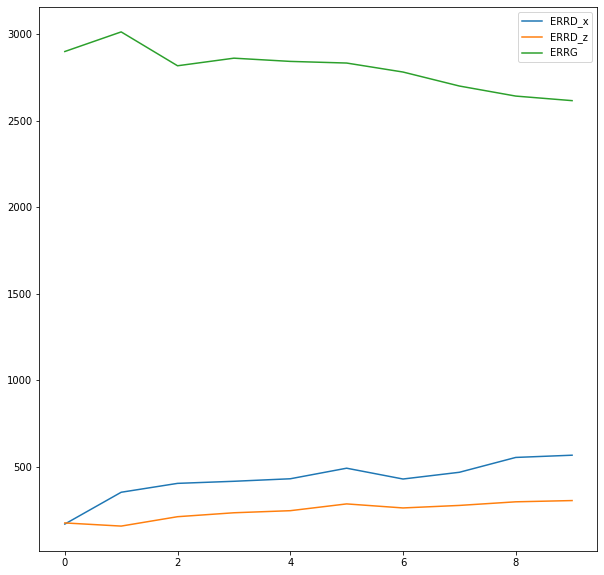

In [21]:
generator = Generator()
discriminator = Discriminator()
optim_G = optim.Adam(params=generator.parameters(), lr=0.0001)
optim_D = optim.Adam(params=discriminator.parameters(), lr=0.0001)

criterion = nn.MSELoss()

noise = Variable(torch.FloatTensor(config.batch_size, config.noise_size))
label = Variable(torch.FloatTensor(config.batch_size))
real_label = 1
fake_label = 0

ERRD_x = np.zeros(config.num_epochs)
ERRD_z = np.zeros(config.num_epochs)
ERRG = np.zeros(config.num_epochs)
#z is noise
#x is pictures
N = len(dataloader)

for epoch in range(config.num_epochs):
    for iteration, (images, cat) in enumerate(dataloader):
        ####### 
        # Generator is fixed
        # Discriminator stage: maximize log(D(x)) + log(1 - D(G(z))) 
        #######
        discriminator.zero_grad()
        
        # real
        label.data.fill_(real_label)
        input_data = images.view(images.shape[0], -1)
        output = discriminator(input_data)
        errD_x = criterion(output, label.unsqueeze(-1))
        ERRD_x[epoch] += errD_x.item()
        errD_x.backward()
        
        # fake 
        noise.data.normal_(0, 1)
        fake = generator(noise)
        label.data.fill_(fake_label)
        output = discriminator(fake.detach())
        errD_z = criterion(output, label.unsqueeze(-1))
        ERRD_z[epoch] += errD_z.item()
        errD_z.backward()
        
        optim_D.step()
        
        ####### 
        # Discriminator is fixed
        # Generator stage: maximize log(D(G(z)) ekv minimize (1-log(D(G(z)))
        #######
        generator.zero_grad()
        label.data.fill_(real_label) #to have only 1st elem in cross-entropy
        output = discriminator(fake) #to have only 2nd elem in gan-formula
        errG = criterion(output, label.unsqueeze(-1))
        ERRG[epoch] += errG.item()
        errG.backward()
        
        optim_G.step()
        
        if (iteration+1) % config.print_freq == 0:
            print('Epoch:{} Iter: {} errD_x: {:.2f} errD_z: {:.2f} errG: {:.2f}'.format(epoch+1,
                                                                                            iteration+1, 
                                                                                            errD_x.item(),
                                                                                            errD_z.item(), 
                                                                                            errG.item()))
            
            
            
                 
plt.figure(figsize=(10,10))
plt.plot(ERRD_x,label='ERRD_x')
plt.plot(ERRD_z,label='ERRD_z')
plt.plot(ERRG,label='ERRG')
plt.legend()
plt.show()

### Сгенерируем картинки этим генератором

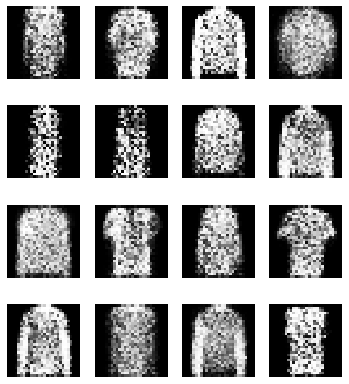

In [22]:
noise.data.normal_(0, 1)
fake = generator(noise)

plt.figure(figsize=(6, 7))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(fake[i].detach().numpy().reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.axis('off')

# 3) Добавьте к обучению GAN условие на метку, продемонстрируйте условную генерацию.

Epoch:1 Iter: 100 errD_x: 0.26 errD_z: 0.10 errG: 2.45
Epoch:1 Iter: 200 errD_x: 0.21 errD_z: 0.31 errG: 1.81
Epoch:1 Iter: 300 errD_x: 0.26 errD_z: 0.16 errG: 2.12
Epoch:1 Iter: 400 errD_x: 0.11 errD_z: 0.11 errG: 2.35
Epoch:1 Iter: 500 errD_x: 0.14 errD_z: 0.13 errG: 2.32
Epoch:1 Iter: 600 errD_x: 0.13 errD_z: 0.06 errG: 3.07
Epoch:1 Iter: 700 errD_x: 0.40 errD_z: 0.05 errG: 2.99
Epoch:1 Iter: 800 errD_x: 0.27 errD_z: 0.10 errG: 2.51
Epoch:1 Iter: 900 errD_x: 0.15 errD_z: 0.30 errG: 1.62
Epoch:1 Iter: 1000 errD_x: 0.32 errD_z: 0.27 errG: 1.64
Epoch:1 Iter: 1100 errD_x: 0.11 errD_z: 0.22 errG: 2.22
Epoch:1 Iter: 1200 errD_x: 0.40 errD_z: 0.07 errG: 3.09
Epoch:1 Iter: 1300 errD_x: 0.17 errD_z: 0.10 errG: 3.04
Epoch:1 Iter: 1400 errD_x: 0.05 errD_z: 0.35 errG: 1.81
Epoch:1 Iter: 1500 errD_x: 0.19 errD_z: 0.23 errG: 2.67
Epoch:1 Iter: 1600 errD_x: 0.14 errD_z: 0.22 errG: 2.27
Epoch:1 Iter: 1700 errD_x: 0.20 errD_z: 0.16 errG: 3.06
Epoch:1 Iter: 1800 errD_x: 0.21 errD_z: 0.07 errG: 3.69
E

Epoch:4 Iter: 3700 errD_x: 0.45 errD_z: 0.04 errG: 3.85
Epoch:5 Iter: 100 errD_x: 0.07 errD_z: 0.16 errG: 2.92
Epoch:5 Iter: 200 errD_x: 0.09 errD_z: 0.14 errG: 3.20
Epoch:5 Iter: 300 errD_x: 0.06 errD_z: 0.12 errG: 3.32
Epoch:5 Iter: 400 errD_x: 0.32 errD_z: 0.13 errG: 3.84
Epoch:5 Iter: 500 errD_x: 0.25 errD_z: 0.03 errG: 5.06
Epoch:5 Iter: 600 errD_x: 0.07 errD_z: 0.37 errG: 4.10
Epoch:5 Iter: 700 errD_x: 0.01 errD_z: 0.34 errG: 3.12
Epoch:5 Iter: 800 errD_x: 0.84 errD_z: 0.01 errG: 4.99
Epoch:5 Iter: 900 errD_x: 0.06 errD_z: 0.20 errG: 3.57
Epoch:5 Iter: 1000 errD_x: 0.07 errD_z: 0.26 errG: 2.97
Epoch:5 Iter: 1100 errD_x: 0.18 errD_z: 0.13 errG: 3.83
Epoch:5 Iter: 1200 errD_x: 0.10 errD_z: 0.13 errG: 5.21
Epoch:5 Iter: 1300 errD_x: 0.15 errD_z: 0.10 errG: 3.34
Epoch:5 Iter: 1400 errD_x: 0.00 errD_z: 0.33 errG: 3.03
Epoch:5 Iter: 1500 errD_x: 0.13 errD_z: 0.19 errG: 2.58
Epoch:5 Iter: 1600 errD_x: 1.10 errD_z: 0.03 errG: 4.19
Epoch:5 Iter: 1700 errD_x: 0.10 errD_z: 0.06 errG: 3.91
E

Epoch:8 Iter: 3600 errD_x: 0.43 errD_z: 0.14 errG: 3.59
Epoch:8 Iter: 3700 errD_x: 0.34 errD_z: 0.15 errG: 3.69
Epoch:9 Iter: 100 errD_x: 0.07 errD_z: 0.28 errG: 2.56
Epoch:9 Iter: 200 errD_x: 0.13 errD_z: 0.11 errG: 3.33
Epoch:9 Iter: 300 errD_x: 1.07 errD_z: 0.09 errG: 2.97
Epoch:9 Iter: 400 errD_x: 0.12 errD_z: 0.20 errG: 3.01
Epoch:9 Iter: 500 errD_x: 0.04 errD_z: 0.27 errG: 2.02
Epoch:9 Iter: 600 errD_x: 0.76 errD_z: 0.12 errG: 2.78
Epoch:9 Iter: 700 errD_x: 0.30 errD_z: 0.36 errG: 3.01
Epoch:9 Iter: 800 errD_x: 0.14 errD_z: 0.28 errG: 2.92
Epoch:9 Iter: 900 errD_x: 0.72 errD_z: 0.43 errG: 2.20
Epoch:9 Iter: 1000 errD_x: 0.52 errD_z: 0.14 errG: 2.49
Epoch:9 Iter: 1100 errD_x: 0.86 errD_z: 0.10 errG: 3.04
Epoch:9 Iter: 1200 errD_x: 0.22 errD_z: 0.20 errG: 2.82
Epoch:9 Iter: 1300 errD_x: 0.51 errD_z: 0.12 errG: 3.85
Epoch:9 Iter: 1400 errD_x: 0.17 errD_z: 0.37 errG: 1.99
Epoch:9 Iter: 1500 errD_x: 0.09 errD_z: 0.30 errG: 2.57
Epoch:9 Iter: 1600 errD_x: 0.44 errD_z: 0.21 errG: 2.62
E

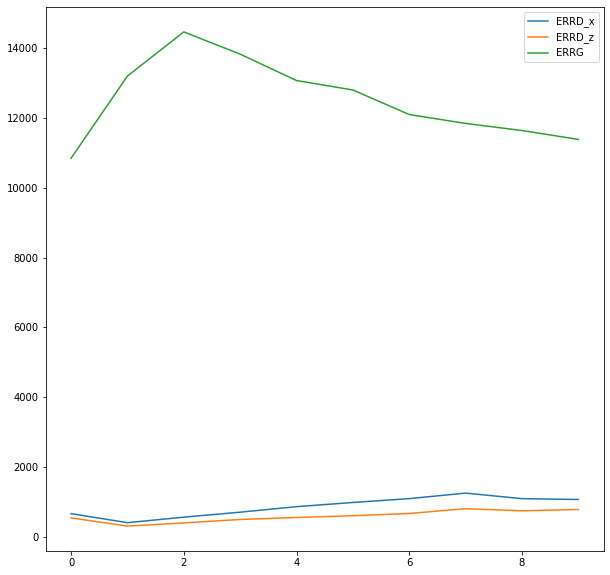

In [26]:
class GeneratorConditional(nn.Module):
    def __init__(self):
        super(GeneratorConditional, self).__init__()
        self.model = nn.Sequential( 
            nn.Linear(config.noise_size+10, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 28*28),
            nn.Sigmoid())
        self.cat_embedding=nn.Embedding(10,10)
        
    def forward(self, x, cats):
        c=self.cat_embedding(cats)
        x=torch.cat([x,c],1)
        return self.model(x)
    
class DiscriminatorConditional(nn.Module):
    def __init__(self):
        super(DiscriminatorConditional, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28 + 10, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 50),
            nn.ReLU(inplace=True),
            nn.Linear(50, 1), 
            nn.Sigmoid())
        self.cat_embedding=nn.Embedding(10,10)
    def forward(self, x,cats):
        c=self.cat_embedding(cats)
        x=torch.cat([x,c],1)
        return self.model(x)
    
generator = GeneratorConditional()
discriminator = DiscriminatorConditional()
optim_G = optim.Adam(params=generator.parameters(), lr=0.0001)
optim_D = optim.Adam(params=discriminator.parameters(), lr=0.0001)

criterion = nn.BCELoss()

noise = Variable(torch.FloatTensor(config.batch_size, config.noise_size))
label = Variable(torch.FloatTensor(config.batch_size))
real_label = 1
fake_label = 0

ERRD_x = np.zeros(config.num_epochs)
ERRD_z = np.zeros(config.num_epochs)
ERRG = np.zeros(config.num_epochs)
#z is noise
#x is pictures
N = len(dataloader)

for epoch in range(config.num_epochs):
    for iteration, (images, cats) in enumerate(dataloader):
        ####### 
        # Generator is fixed
        # Discriminator stage: maximize log(D(x)) + log(1 - D(G(z))) 
        #######
        discriminator.zero_grad()
        
        # real
        label.data.fill_(real_label)
        input_data = images.view(images.shape[0], -1)
        output = discriminator(input_data,cats)
        errD_x = criterion(output, label.unsqueeze(-1))
        ERRD_x[epoch] += errD_x.item()
        errD_x.backward()
        
        # fake 
        noise.data.normal_(0, 1)
        fake_cats = torch.randint(0, 10, (config.batch_size,))
        fake = generator(noise,fake_cats)
        label.data.fill_(fake_label)
        output = discriminator(fake.detach(), fake_cats)
        errD_z = criterion(output, label.unsqueeze(-1))
        ERRD_z[epoch] += errD_z.item()
        errD_z.backward()
        
        optim_D.step()
        
        ####### 
        # Discriminator is fixed
        # Generator stage: maximize log(D(G(z)) ekv minimize (1-log(D(G(z)))
        #######
        generator.zero_grad()
        label.data.fill_(real_label) #to have only 1st elem in cross-entropy
        output = discriminator(fake,fake_cats) #to have only 2nd elem in gan-formula
        errG = criterion(output, label.unsqueeze(-1))
        ERRG[epoch] += errG.item()
        errG.backward()
        
        optim_G.step()
        
        if (iteration+1) % config.print_freq == 0:
            print('Epoch:{} Iter: {} errD_x: {:.2f} errD_z: {:.2f} errG: {:.2f}'.format(epoch+1,
                                                                                            iteration+1, 
                                                                                            errD_x.item(),
                                                                                            errD_z.item(), 
                                                                                            errG.item()))
            
            
            
                 
plt.figure(figsize=(10,10))
plt.plot(ERRD_x,label='ERRD_x')
plt.plot(ERRD_z,label='ERRD_z')
plt.plot(ERRG,label='ERRG')
plt.legend()
plt.show()

### Сгенерируем картинки-футболки (то есть класс с меткой 0) этим генератором

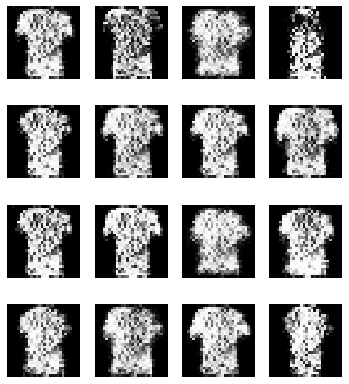

In [41]:
noise.data.normal_(0, 1)
wanted_cats = torch.LongTensor(0 * np.ones(config.batch_size))
fake = generator(noise,wanted_cats)

plt.figure(figsize=(6, 7))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(fake[i].detach().numpy().reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.axis('off')

### 4) Напишите отчет что попробовали, какие результаты получили, как вам кажется надо обучать GAN, чтобы добиться сходимости?

Gan и LSGan отработали примерно одинаково, а вот с условной генерацией пришлось повозиться. То есть если просто к входному вектору приклеивать one-shot-encoding вектора классов, то оно не обучается, пришлось делать embedding этого вектора классов. И если при обучении в качестве ответа на этом векторе классов ставить не случайные ответы, а исходный ответ - то тоже не обучается.